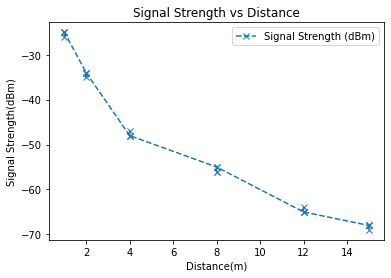

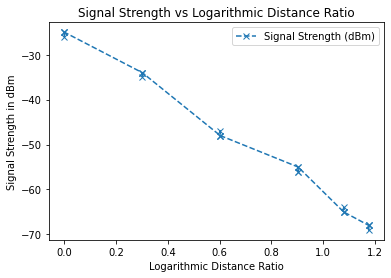

In [ ]:
import pandas as pd
data = pd.read_csv("Dataset.csv")
import numpy as np
import matplotlib.pyplot as plt
data.plot(x="Distance (m)", y="Signal Strength (dBm)", style='x--')
plt.ylabel('Signal Strength(dBm)')
plt.xlabel('Distance(m)')
plt.title('Signal Strength vs Distance')
plt.show()

# we need to find logarithmic distance ratio
# taken log here as we have d0 = 1 m 
data['logdist']=np.log10(data['Distance (m)'])
data.plot(x="logdist", y="Signal Strength (dBm)", style='x--')
plt.xlabel('Logarithmic Distance Ratio')
plt.ylabel('Signal Strength in dBm')
plt.title('Signal Strength vs Logarithmic Distance Ratio')
plt.show()


slope is: -36.66370091527088
intercept is: -24.47368683752694


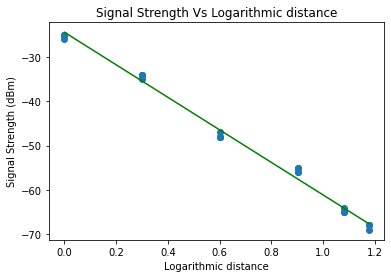

The value of R-squared score comes as : 0.9930063161106407
Path loss exponent : 3.666370091527088
Variance in RSSI samples is 1.684008658046319


In [ ]:
# best fit line

X = np.asarray(data["logdist"])
Y = np.asarray(data["Signal Strength (dBm)"])

def best_fit(Y, X):
    n= len(Y)
    sumx = np.sum(X)
    sumy= np.sum(Y)
    xavg = sumx/(n)
    yavg = sumy/n
    m= (np.sum([x*y for x,y in zip(X,Y)])-len(X) * xavg * yavg ) / (np.sum([x**2 for x in X]) - len(X) * xavg**2)
    c = yavg - m * xavg
    return c, m


c, m = best_fit(Y,X)       # we need to find intercept and slope of the best fit line
print("slope is:", m)
print("intercept is:", c)
y_fit=[m*x +c for x in X]
plt.plot(X, Y,'o')
plt.plot(X, y_fit, 'g')
plt.title('Signal Strength Vs Logarithmic distance')
plt.xlabel('Logarithmic distance')
plt.ylabel('Signal Strength (dBm)')
plt.show()

# Now we calculate R-squared score 
# Value close to 1 means close to the perfect model
from sklearn.metrics import r2_score 

R2_score = r2_score(Y, y_fit)
print ('The value of R-squared score comes as :', R2_score)

# finding pathloss exponent
pathloss_exp= (abs(m/10))
print('Path loss exponent :', pathloss_exp) 

#to calculate the variance in RSSI values
variance=np.mean(np.square(y_fit - Y))
print('Variance in RSSI samples is', variance) 

In [ ]:
Pr_d0 = -25    # for 1 meter
# distance and strength calculated experimentally
expt_dist = { 2 : -34,4 : -48,8 : -56,12: -65,15: -68}

# Now we try to calculate/estimate here values of distance and finally get distance error associated

for dist in expt_dist:
  expt_dist[dist] =  pow(10,(Pr_d0- expt_dist[dist])/(10*pathloss_exp)) 
  print('Distance calculated from given Power strength at', dist, 'metres is', expt_dist[dist], 'metres')

sum =  0 # error sum
for k in expt_dist:
  abserr = abs(expt_dist[k]-k)    # absolute error
  print('Absolute error in the distance calculation at distance of', k, 'metres is', abserr, 'm')
  sum = sum + abserr

print('Avg error in the distance calculation :', sum/5, 'metres')

Distance calculated from given Power strength at 2 metres is 1.7598449263844205 metres
Distance calculated from given Power strength at 4 metres is 4.239586179927582 metres
Distance calculated from given Power strength at 8 metres is 7.006851846681361 metres
Distance calculated from given Power strength at 12 metres is 12.330972672309498 metres
Distance calculated from given Power strength at 15 metres is 14.887512372703446 metres
Absolute error in the distance calculation at distance of 2 metres is 0.24015507361557953 m
Absolute error in the distance calculation at distance of 4 metres is 0.23958617992758224 m
Absolute error in the distance calculation at distance of 8 metres is 0.9931481533186393 m
Absolute error in the distance calculation at distance of 12 metres is 0.3309726723094979 m
Absolute error in the distance calculation at distance of 15 metres is 0.11248762729655404 m
Avg error in the distance calculation : 0.3832699412935706 metres
